In [4]:
import pandas as pd

In [109]:
retail = pd.read_csv('Online_Retail_Data_Set.csv', encoding = "ISO-8859-1")

In [110]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [111]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [112]:
retail['CustomerID'] = retail['CustomerID'].apply(lambda x:str(x))

In [113]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [114]:
retail.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [115]:
retail = retail[retail['UnitPrice']>0]

In [116]:
retail = retail[retail['Quantity']>=1]

In [117]:
retail.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [118]:
retail.sort_values('Quantity',ascending=False).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,5/27/2011 10:52,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2/22/2011 10:43,0.82,18087.0,United Kingdom


In [119]:
retail['Revenue'] = retail['Quantity']*retail['UnitPrice']

In [120]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [121]:
retail.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)/1000

Country
United Kingdom    9025.222084
Netherlands        285.446340
EIRE               283.453960
Germany            228.867140
France             209.715110
Australia          138.521310
Spain               61.577110
Switzerland         57.089900
Belgium             41.196340
Sweden              38.378330
Name: Revenue, dtype: float64

In [122]:
retail.groupby(['StockCode','Description'])['Revenue'].sum().sort_values(ascending=False).head(10)

StockCode  Description                       
DOT        DOTCOM POSTAGE                        206248.77
22423      REGENCY CAKESTAND 3 TIER              174484.74
23843      PAPER CRAFT , LITTLE BIRDIE           168469.60
85123A     WHITE HANGING HEART T-LIGHT HOLDER    104340.29
47566      PARTY BUNTING                          99504.33
85099B     JUMBO BAG RED RETROSPOT                94340.05
23166      MEDIUM CERAMIC TOP STORAGE JAR         81700.92
M          Manual                                 78110.27
POST       POSTAGE                                78101.88
23084      RABBIT NIGHT LIGHT                     66964.99
Name: Revenue, dtype: float64

Question 1:\
The CEO of the retail store is interested to view the time series of the revenue data for the year 2011 only. He would like to view granular data by looking into revenue for each month. The CEO is interested in viewing the seasonal trends and wants to dig deeper into why these trends occur. This analysis will be helpful for the CEO to forecast for the next year.

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [124]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [131]:
retail['InvoiceDate'] = retail['InvoiceDate'].apply(lambda x:x.split()[0])

In [132]:
retail['InvoiceDate']

0         12/1/2010
1         12/1/2010
2         12/1/2010
3         12/1/2010
4         12/1/2010
            ...    
541904    12/9/2011
541905    12/9/2011
541906    12/9/2011
541907    12/9/2011
541908    12/9/2011
Name: InvoiceDate, Length: 530104, dtype: object

In [143]:
retail_2011 = retail[retail['InvoiceDate'].apply(lambda x:x[-4:]) == '2011']

In [144]:
retail_2011.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011,1.95,13313.0,United Kingdom,19.5
42482,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011,0.42,13313.0,United Kingdom,10.5
42483,539993,21498,RED RETROSPOT WRAP,25,1/4/2011,0.42,13313.0,United Kingdom,10.5
42484,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011,2.10,13313.0,United Kingdom,10.5
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011,1.25,13313.0,United Kingdom,12.5


In [164]:
retail_2011['Month'] = retail_2011['InvoiceDate'].apply(lambda x:x.split('/')[0])

<ipython-input-164-0365cfadfebb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_2011['Month'] = retail_2011['InvoiceDate'].apply(lambda x:x.split('/')[0])


In [166]:
retail_2011.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011,1.95,13313.0,United Kingdom,19.5,1
42482,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011,0.42,13313.0,United Kingdom,10.5,1
42483,539993,21498,RED RETROSPOT WRAP,25,1/4/2011,0.42,13313.0,United Kingdom,10.5,1
42484,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011,2.10,13313.0,United Kingdom,10.5,1
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011,1.25,13313.0,United Kingdom,12.5,1


<AxesSubplot:xlabel='Month', ylabel='Revenue'>

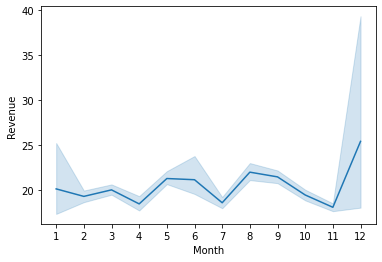

In [173]:
sns.lineplot(x='Month', y='Revenue', data=retail_2011)

In [174]:
# Add label on each data point

Question 2:\
The CMO is interested in viewing the top 10 countries which are generating the highest revenue. Additionally, the CMO is also interested in viewing the quantity sold along with the revenue generated. The CMO does not want to have the United Kingdom in this visual.

In [184]:
retail.groupby('Country').sum()['Revenue'].sort_values(ascending=False).head(10)

Country
United Kingdom    9.025222e+06
Netherlands       2.854463e+05
EIRE              2.834540e+05
Germany           2.288671e+05
France            2.097151e+05
Australia         1.385213e+05
Spain             6.157711e+04
Switzerland       5.708990e+04
Belgium           4.119634e+04
Sweden            3.837833e+04
Name: Revenue, dtype: float64

In [190]:
retail['Rev by Country'] = retail.groupby('Country')['Revenue'].transform('sum')

In [197]:
retail['Rev by Country(K)'] = retail['Rev by Country']/1000

In [200]:
retail.drop(columns='Rev by Country')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Rev by Country(K)
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom,15.30,9.025222
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom,20.34,9.025222
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom,22.00,9.025222
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom,20.34,9.025222
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom,20.34,9.025222
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011,0.85,12680.0,France,10.20,0.209715
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011,2.10,12680.0,France,12.60,0.209715
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011,4.15,12680.0,France,16.60,0.209715
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011,4.15,12680.0,France,16.60,0.209715


In [204]:
retail['Qty by Country'] = retail.groupby('Country')['Quantity'].transform('sum')

In [205]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Rev by Country,Rev by Country(K),Qty by Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom,15.30,9025.222084,9.025222,4662390
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom,20.34,9025.222084,9.025222,4662390


In [227]:
top10Rev_Country = retail.groupby('Country').mean()[['Rev by Country(K)','Qty by Country']].sort_values(by='Rev by Country(K)', ascending = False).head(11)

In [228]:
top10Rev_Country = top10Rev_Country.reset_index()[top10Rev_Country.reset_index()['Country'] != 'United Kingdom']

In [229]:
top10Rev_Country

,Country,Rev by Country(K),Qty by Country
1,Netherlands,0.285446,200361.0
2,EIRE,0.283454,147173.0
3,Germany,0.228867,119261.0
4,France,0.209715,112103.0
5,Australia,0.138521,83901.0
6,Spain,0.061577,27940.0
7,Switzerland,0.057090,30629.0
8,Belgium,0.041196,23237.0
9,Sweden,0.038378,36083.0
10,Japan,0.037416,26016.0


Text(0.5, 1.0, 'Revenue by Country')

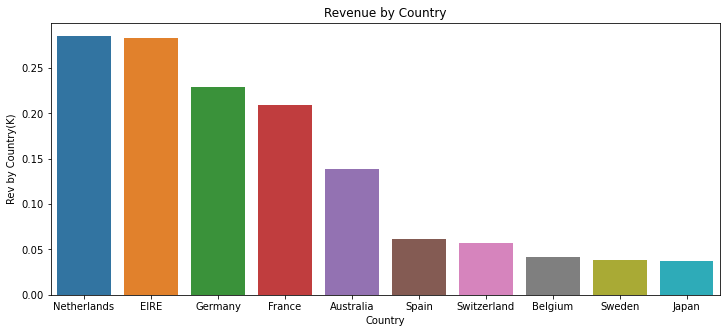

In [237]:
plt.figure(figsize=(12,5))
g = sns.barplot(x='Country', y='Rev by Country(K)', data = top10Rev_Country)

plt.title('Revenue by Country')

Question 3:\
The CMO of the online retail store wants to view the information on the top 10 customers by revenue. He is interested in a visual that shows the greatest revenue generating customer at the start and gradually declines to the lower revenue generating customers. The CMO wants to target the higher revenue generating customers and ensure that they remain satisfied with their products.

In [242]:
rev_by_customer = retail.groupby('CustomerID').sum()['Revenue'].sort_values(ascending=False)

In [245]:
rev_by_customer = rev_by_customer.reset_index()

In [256]:
rev_by_customer_Top10 = rev_by_customer[rev_by_customer['CustomerID'] != 'nan'].head(10)

In [257]:
rev_by_customer_Top10

,CustomerID,Revenue
1,14646.0,280206.02
2,18102.0,259657.30
3,17450.0,194550.79
4,16446.0,168472.50
5,14911.0,143825.06
6,12415.0,124914.53
7,14156.0,117379.63
8,17511.0,91062.38
9,16029.0,81024.84
10,12346.0,77183.60


In [265]:
#plt.figure(figsize=(12,5))
#sns.barplot(x='CustomerID',y='Revenue', data='rev_by_customer_Top10')

Question 4:\
The CEO is looking to gain insights on the demand for their products. He wants to look at all countries and see which regions have the greatest demand for their products. Once the CEO gets an idea of the regions that have high demand, he will initiate an expansion strategy which will allow the company to target these areas and generate more business from these regions. He wants to view the entire data on a single view without the need to scroll or hover over the data points to identify the demand. There is no need to show data for the United Kingdom as the CEO is more interested in viewing the countries that have expansion opportunities.

In [266]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Rev by Country,Rev by Country(K),Qty by Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom,15.30,9025.222084,9.025222,4662390
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom,20.34,9025.222084,9.025222,4662390


In [269]:
retail.groupby('Country').mean()['Qty by Country'].sort_values(ascending=False)

Country
United Kingdom          4662390.0
Netherlands              200361.0
EIRE                     147173.0
Germany                  119261.0
France                   112103.0
Australia                 83901.0
Sweden                    36083.0
Switzerland               30629.0
Spain                     27940.0
Japan                     26016.0
Belgium                   23237.0
Norway                    19336.0
Portugal                  16258.0
Finland                   10704.0
Channel Islands            9491.0
Denmark                    8235.0
Italy                      8112.0
Cyprus                     6361.0
Singapore                  5241.0
Austria                    4881.0
Hong Kong                  4773.0
Israel                     4409.0
Poland                     3684.0
Unspecified                3300.0
Canada                     2763.0
Iceland                    2458.0
USA                        2458.0
Greece                     1557.0
United Arab Emirates        982.0
Malta 